## Analyzing screen

In [163]:
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore') 

import os
import pandas as pd

path = '../../dgym-data/analysis/mpo/'
files = os.listdir(path)
files = [path + f for f in files]

In [167]:
df = pd.concat([
    pd.read_csv(f, sep='\t') for f in files
]).reset_index(drop=True)

df = df.drop(columns='smiles')

In [168]:
from dgym.envs.utility import MultipleUtilityFunction, ClassicUtilityFunction

# create evaluators
docking_utility_function = ClassicUtilityFunction(
    ideal=(9, 13),
    acceptable=(8, 13)
)

log_P_utility_function = ClassicUtilityFunction(
    ideal=(0.5, 1.85),
    acceptable=(-0.5, 3.5)
)

log_S_utility_function = ClassicUtilityFunction(
    ideal=(-3, 1),
    acceptable=(-4, 1)
)

composite_utility_function = MultipleUtilityFunction([
    docking_utility_function, log_P_utility_function, log_S_utility_function])

In [169]:
df['Composite Utility'] = composite_utility_function(
    df.values,
    method='average'
)

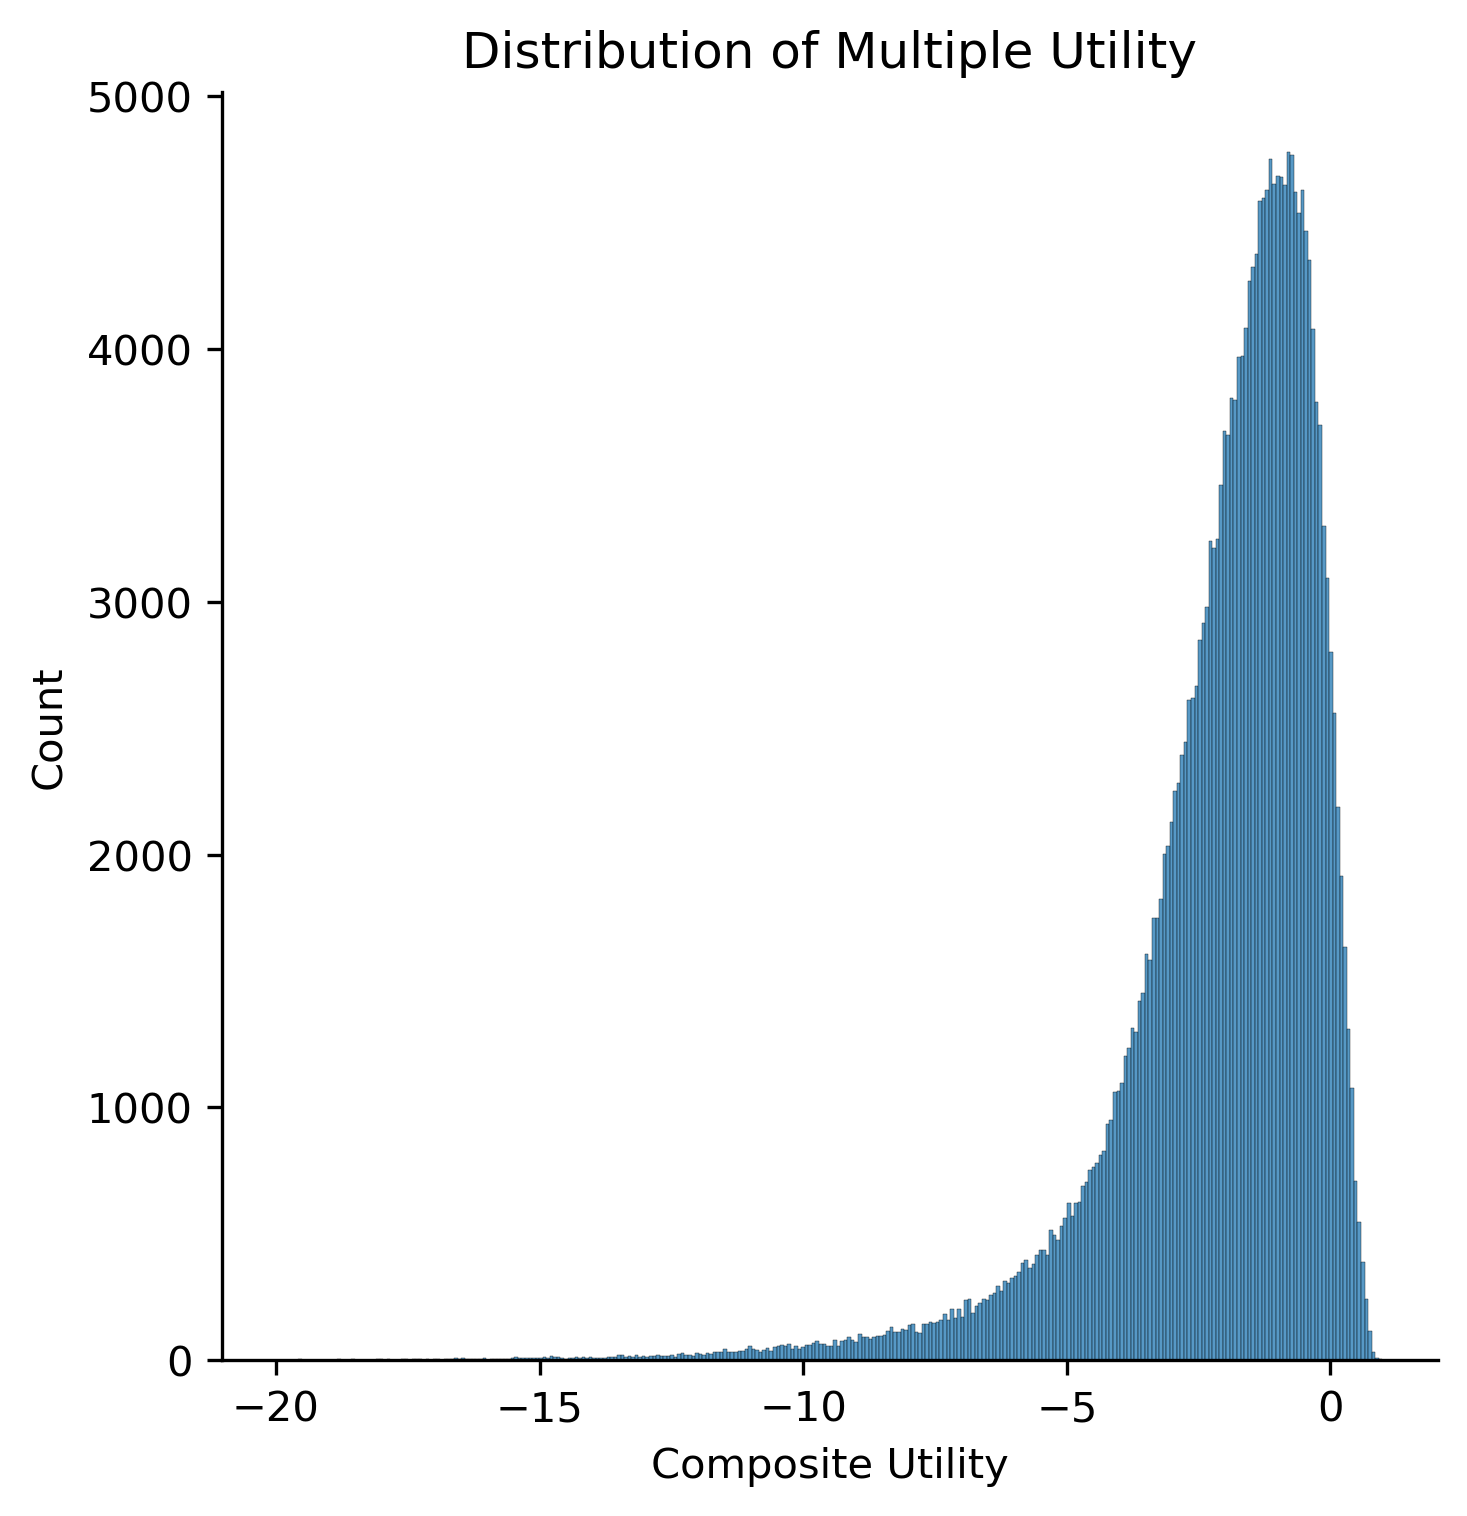

In [130]:
g = sns.displot(df.query('`Composite Utility` > -20')['Composite Utility'])
plt.title('Distribution of Multiple Utility')
plt.xlabel('Composite Utility')
g.fig.set_dpi(300)

<Figure size 1920x1440 with 0 Axes>

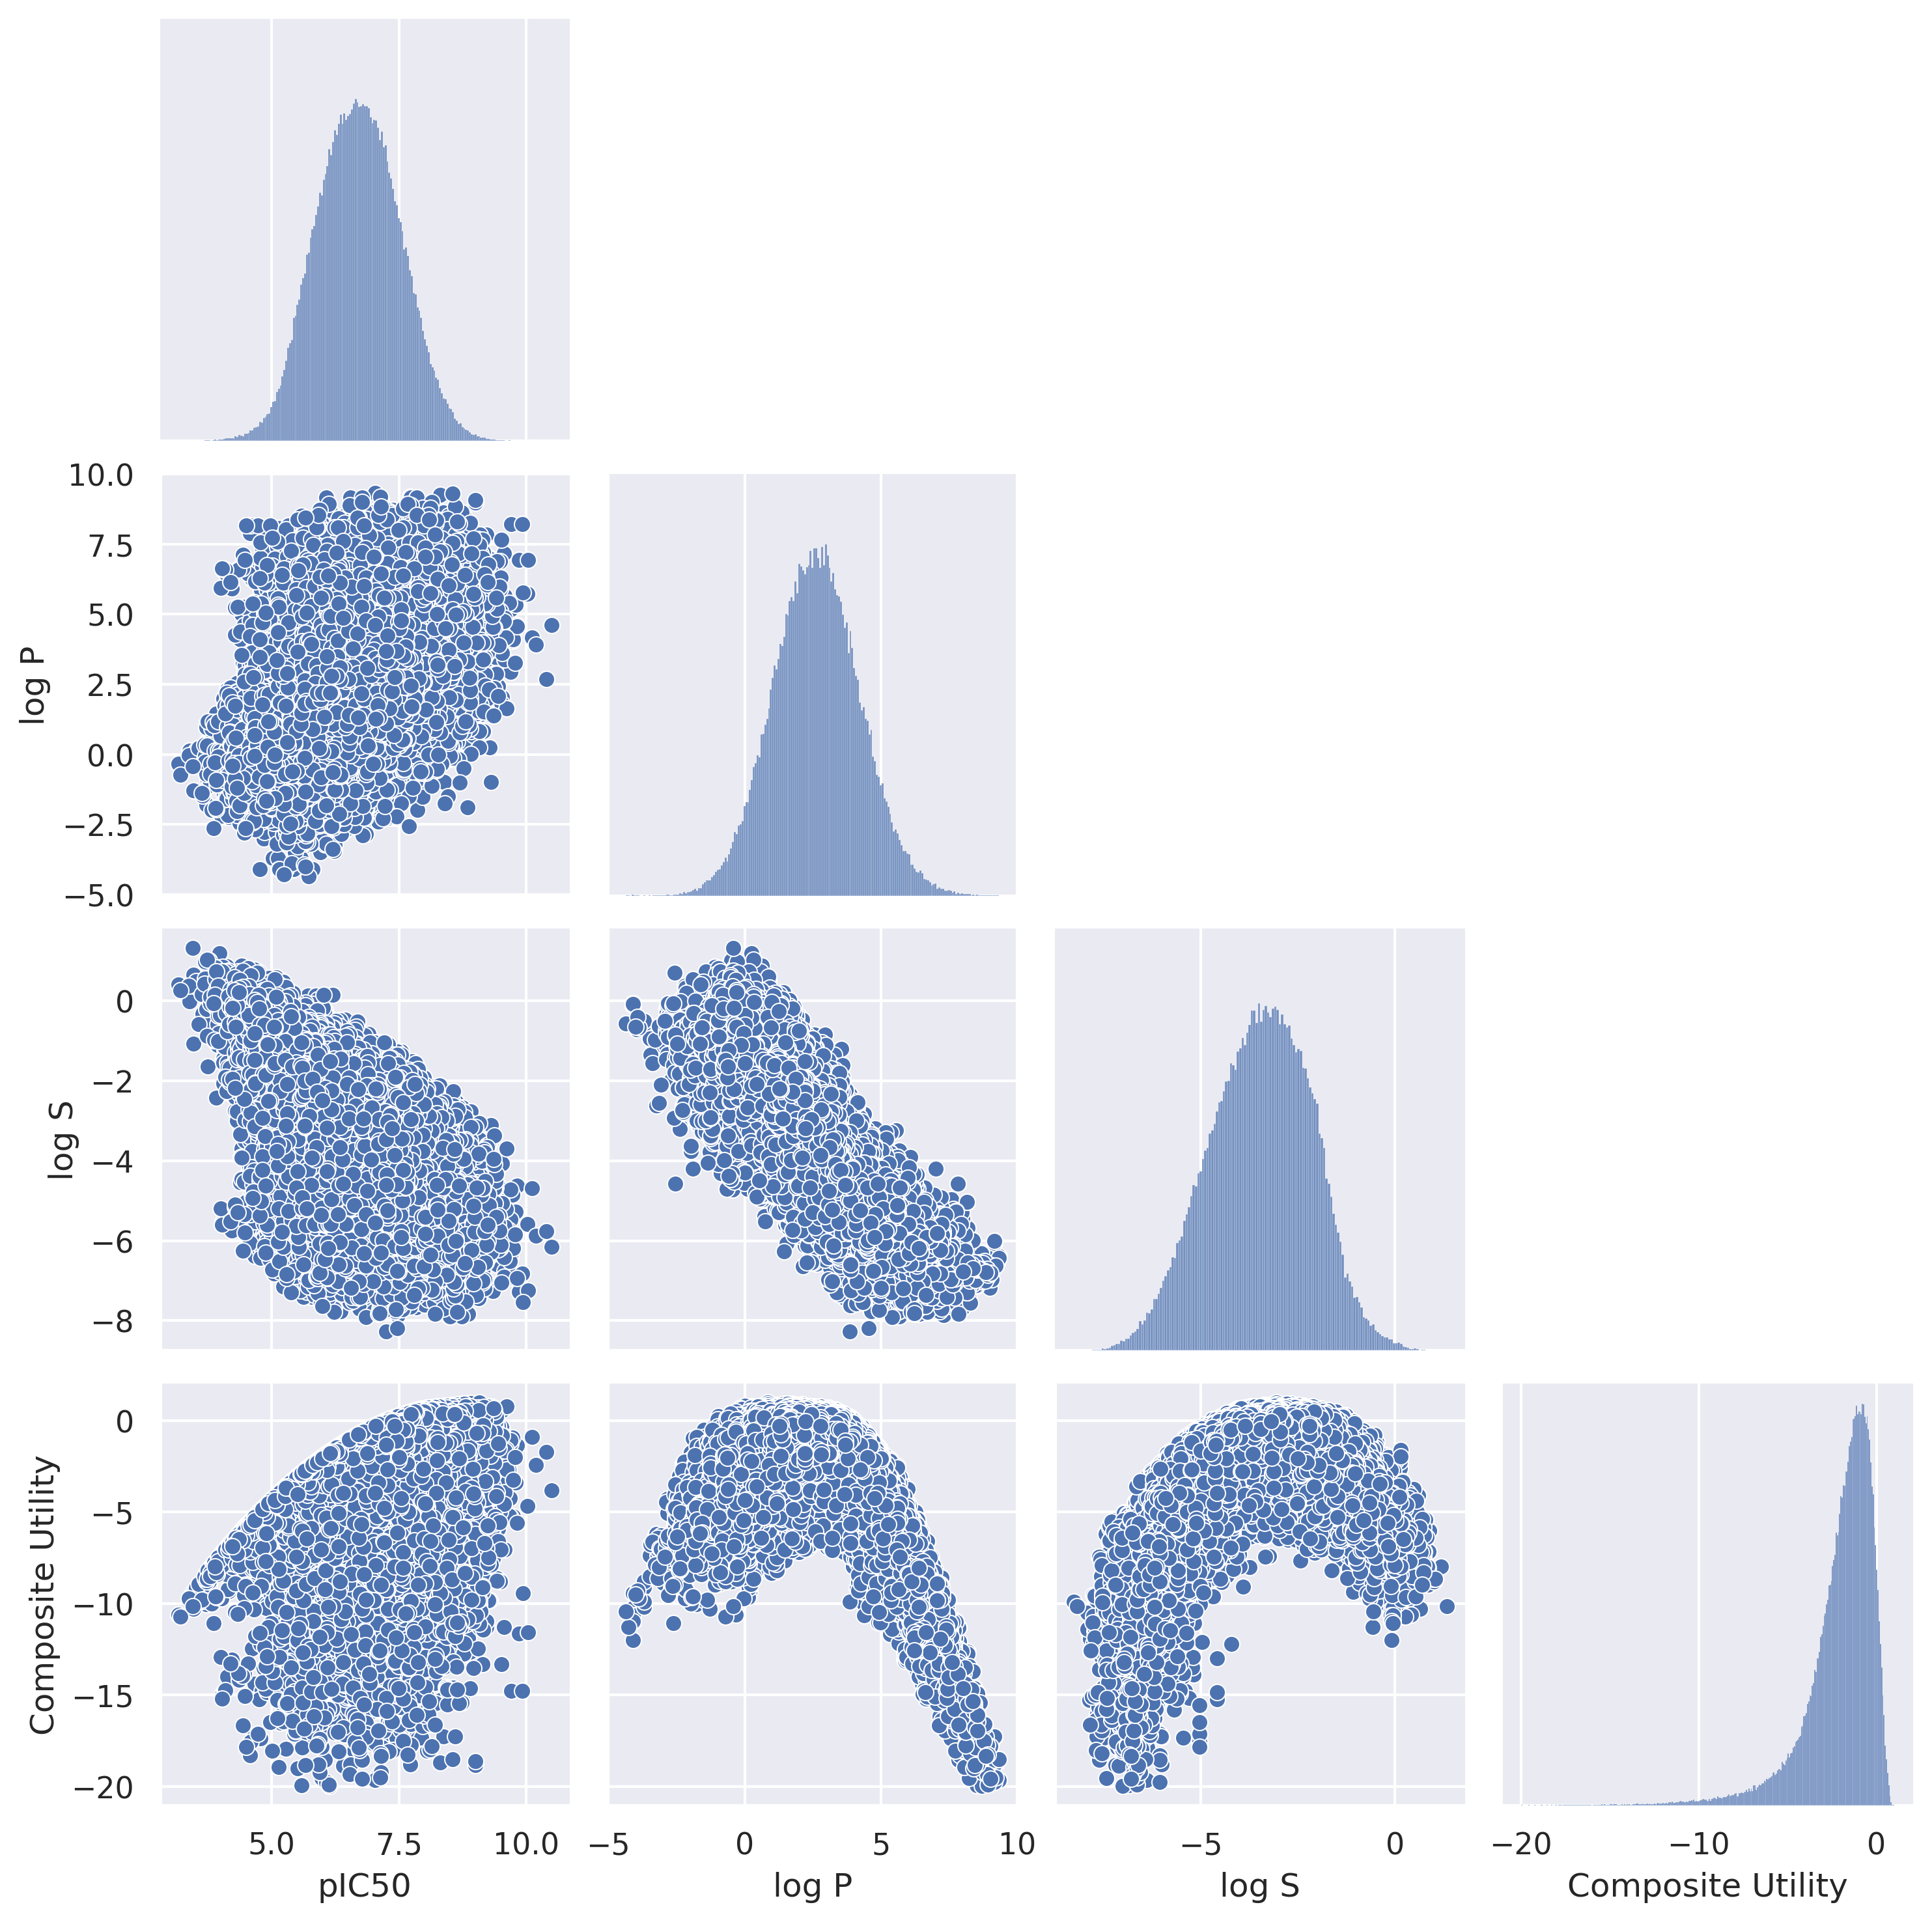

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(dpi=300)
g = sns.pairplot(
    (
        df
        .query('`Composite Utility` > -20')
        # .sort_values('mpo')
    ),
    corner=True,
    # hue='mpo'
)
g.fig.set_dpi(300)

In [170]:
import numpy as np
(df['Composite Utility'] > 0.9).sum()

5

In [171]:
df.query('`Composite Utility` > 0.9')

,pIC50,log P,log S,Composite Utility
103439,8.842997,1.6921,-3.122590,0.906803
174413,8.743936,1.4414,-2.664853,0.914645
197720,8.909405,0.8404,-3.052723,0.952227
197724,9.085007,0.8404,-3.052723,0.982426
246824,8.788213,1.5616,-2.781624,0.929404


In [205]:
(
    df.query('pIC50 > 9.5')
    .query('`log P` < 3.5')
    .query('`log S` > -4')
    .sort_values('Composite Utility', ascending=False)
)

,pIC50,log P,log S,Composite Utility
69915,9.612976,1.6528,-3.700195,0.766602


In [206]:
len(df)

314700

In [202]:
27 / len(df) * 100

0.008579599618684462

In [188]:
for value, utility_function in zip(
    df.iloc[197724].drop('Composite Utility'),
    composite_utility_function.utility_functions
):
    print(utility_function(value))

1.0
1.0
0.9472770011126981


In [184]:
composite_utility_function.utility_functions(df.iloc[197724].drop('Composite Utility').tolist(), method='average')

array([[   1.        ,    0.        ,    0.        ],
       [ -65.57907216,    0.5       ,    0.        ],
       [-144.26813169,    0.        ,    1.        ]])

In [185]:
df.iloc[197724].drop('Composite Utility').tolist()

[9.085007014265017, 0.8403999999999994, -3.052722998887302]

In [140]:
len(df)

314700

In [148]:
(5 / len(df))*100

0.0015888147442008264

In [133]:
df.iloc[69915]

pIC50                9.612976
log P                1.652800
log S               -3.700195
Composite Utility    0.766602
Name: 69915, dtype: float64

In [106]:
df.shape

(314700, 4)